In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py


from scipy.optimize import curve_fit

In [80]:
symmetrizeArray(np.asarray([2,1,2,3,7,8]),-1)

array([-8, -7, -3, -2, -1,  2,  1,  2,  3,  7,  8])

# Broken phase

$z=-2, \chi=5$

In [2]:
data1 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="old")
dt=0.8

Magnetization, check we are thermalized

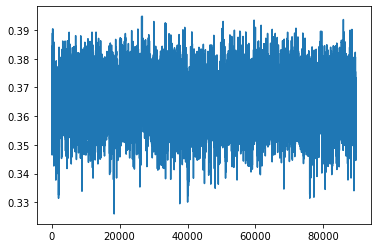

In [26]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

Compute $\langle j_A(t) j_A(0)\rangle$ correlator and Fourier transform.

In [20]:
#tMax is maximum distance in time (time units), blockSize is the size of one block  (time units). Error function is 
# to compute the error. For now, can basically choose between bootstrap and jackknife. 
data1.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

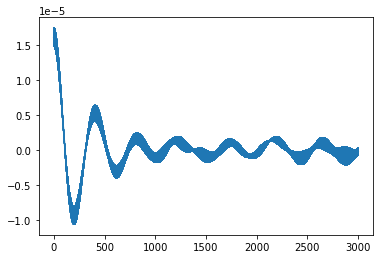

In [22]:
plt.errorbar(data1.OtOttp_time["A"], data1.OtOttp_mean["A"],data1.OtOttp_err["A"])

In [81]:
# filterFunc is the filter to be applied to the fourrier transform, to kill a bit of the noise at late time.
data1.computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))

#TODO: compute half of it and symmetrize.

<ErrorbarContainer object of 3 artists>

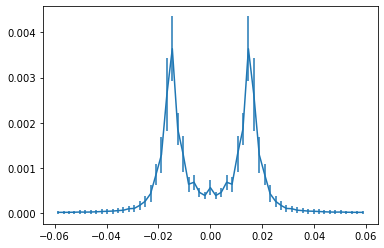

In [82]:
plt.errorbar(data1.OtOttpSpecFunc_oms["A"], data1.OtOttpSpecFunc_mean["A"], data1.OtOttpSpecFunc_err["A"])

We compare here the results obtained from evolver 8.

In [4]:
data2 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c00500_ev8.h5",thTime=400,dt=0.8, decim=1, data_format="semiold")
dt=0.8

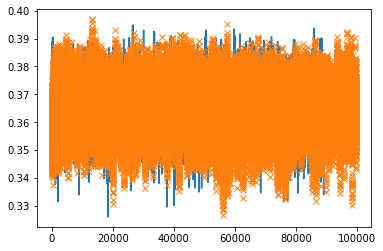

In [28]:
data2.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
t=np.arange(len(data2.phi)) * dt
plt.plot(t[:],data2.phi[:,0],'x')
plt.show()

In [33]:
data2.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,50))

<ErrorbarContainer object of 3 artists>

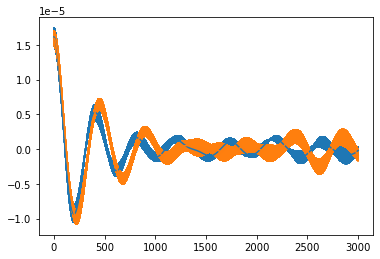

In [34]:
plt.errorbar(data1.OtOttp_time["A"], data1.OtOttp_mean["A"],data1.OtOttp_err["A"])
plt.errorbar(data2.OtOttp_time["A"], data2.OtOttp_mean["A"],data2.OtOttp_err["A"])

In [83]:
data2.computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))


<ErrorbarContainer object of 3 artists>

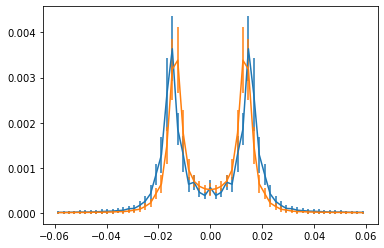

In [84]:
plt.errorbar(data1.OtOttpSpecFunc_oms["A"], data1.OtOttpSpecFunc_mean["A"], data1.OtOttpSpecFunc_err["A"])
plt.errorbar(data2.OtOttpSpecFunc_oms["A"], data2.OtOttpSpecFunc_mean["A"], data2.OtOttpSpecFunc_err["A"])

In [44]:
data2.computeOtOtpBlocked("phi",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

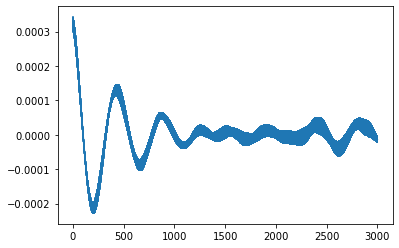

In [52]:
plt.errorbar(data2.OtOttp_time["phi"], data2.OtOttp_mean["phi"],data2.OtOttp_err["phi"])

In [106]:
data2.computeStatCor("phi", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2500.0))


(-0.01, 0.08)

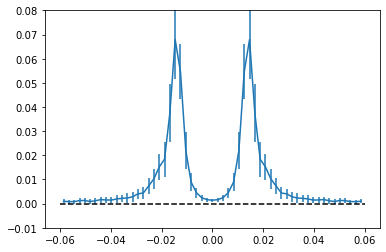

In [107]:
plt.errorbar(data2.OtOttpSpecFunc_oms["phi"], data2.OtOttpSpecFunc_mean["phi"], data2.OtOttpSpecFunc_err["phi"])
plt.plot([-0.06,0.06],[0,0],'--k')
plt.ylim([-0.01,0.08])

In [5]:
data2.computeOtOtpBlocked("phi0",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10), conn=True)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

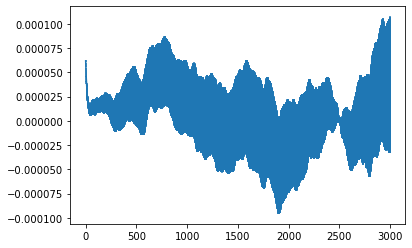

In [6]:
plt.errorbar(data2.OtOttp_time["phi0"], data2.OtOttp_mean["phi0"],data2.OtOttp_err["phi0"])

In [7]:
data2.computeStatCor("phi0", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 200.0))


<ErrorbarContainer object of 3 artists>

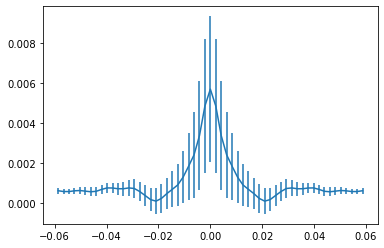

In [8]:
plt.errorbar(data2.OtOttpSpecFunc_oms["phi0"], data2.OtOttpSpecFunc_mean["phi0"], data2.OtOttpSpecFunc_err["phi0"])


# Unbroken phase

In [13]:
data3 = ConfResults(fn="../data/zplus_N048_m-0445648_h003684_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="old")
dt=0.8

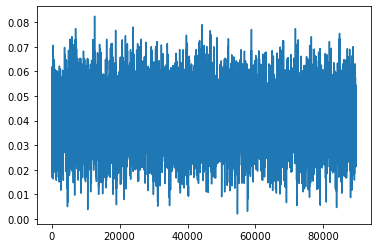

In [54]:
data3.readAv()
dt = 0.8
t=np.arange(len(data3.phi)) * dt
plt.figure(1)
plt.plot(t[:],data3.phi[:,0])
plt.show()

In [60]:
data3.computeOtOtpBlocked("A",tMax = 5000.0, blockSizeT = 8000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

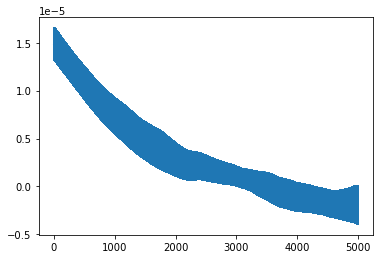

In [61]:
plt.errorbar(data3.OtOttp_time["A"], data3.OtOttp_mean["A"],data3.OtOttp_err["A"])


In [108]:
data3.computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 4000.0))


<ErrorbarContainer object of 3 artists>

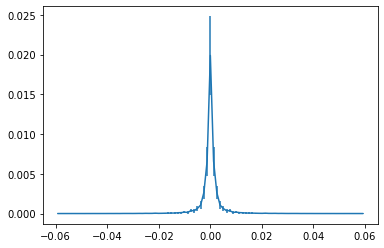

In [109]:
plt.errorbar(data3.OtOttpSpecFunc_oms["A"], data3.OtOttpSpecFunc_mean["A"], data3.OtOttpSpecFunc_err["A"])

In [14]:
data3.computeOtOtpBlocked("phi0",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10), conn=True)

<ErrorbarContainer object of 3 artists>

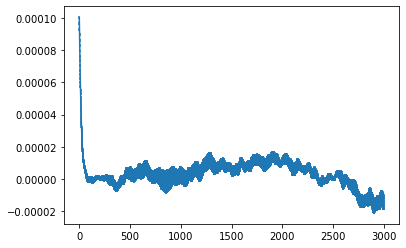

In [19]:
plt.errorbar(data3.OtOttp_time["phi0"], data3.OtOttp_mean["phi0"],data3.OtOttp_err["phi0"])

In [26]:
data3.computeStatCor("phi0", omMax=0.12, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 200.0))


<ErrorbarContainer object of 3 artists>

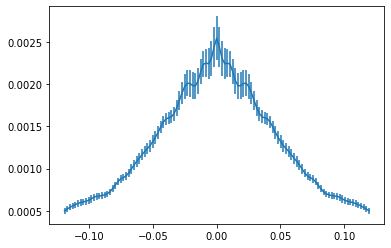

In [27]:
plt.errorbar(data3.OtOttpSpecFunc_oms["phi0"], data3.OtOttpSpecFunc_mean["phi0"], data3.OtOttpSpecFunc_err["phi0"])

# Critical line

We want to see some scaling. From Hohenberg and Halperin, the dynamical scaling for the response function is
$$
\rho(\omega,\vec{k}) = \rho(\vec{k}) Y\left(\frac{\omega}{\Omega_0}\xi^z,k\xi,\frac{K_0}{|h_\psi|^{1/\beta\delta}}\Delta T\right)
$$
with $\xi$ the correlation length. At $\vec{k}=0, \Delta T =0$, it reduces to 
$$
\rho(\omega,0) = \rho_0 Y\left(\frac{\omega}{\Omega_0}\xi^z\right) \ .
$$
In terms of $h$, we have $\xi=h^{-\nu_c}$ and we thus expect
$$
\rho(\omega,0) = \rho_0 Y\left(\frac{\omega}{\Omega_0}h^{-\nu_c z}\right) \ .
$$
From Derek's notebook (and paper by Engels), $\nu_c = 0.402432$ and we expect $z\approx 1.5$, giving

In [15]:
nuc = 0.402432
z = 1.5
-nuc * z

-0.603648

In [28]:
data = dict()
data["h0002"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="new")
data["h0004"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h004000_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="new")
data["h0006"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h006000_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="new")
data["h001"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h010000_c00500.h5",thTime=400,dt=0.8, decim=1, data_format="new")

hkeys = ["h0002", "h0004", "h0006", "h001"]

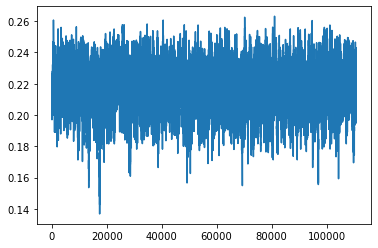

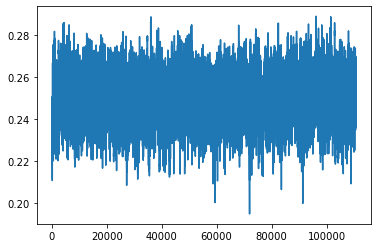

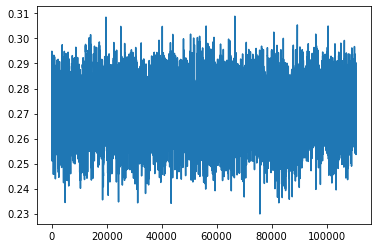

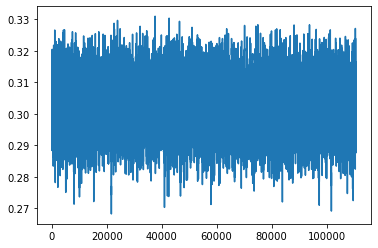

In [29]:
c=0
for k in hkeys:
    data[k].readAv()
    dt = 0.8
    t=np.arange(len(data[k].phi)) * dt
    plt.figure(c)
    plt.plot(t[:],data[k].phi[:,0])
    plt.show()
    c+=1

In [ ]:
for k in hkeys:
    print(k)
    data[k].computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

h0002
h0004
h0006


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


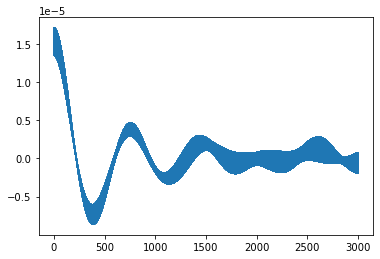

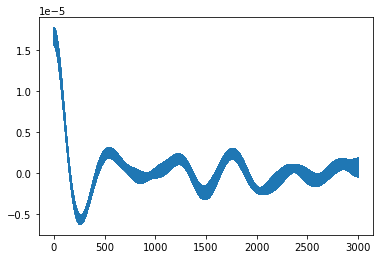

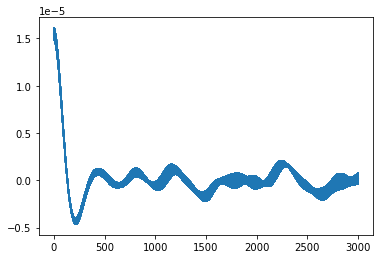

In [140]:
c=0
for k in hkeys:
    plt.figure(c)
    plt.errorbar(data[k].OtOttp_time["A"], data[k].OtOttp_mean["A"],data[k].OtOttp_err["A"])
    plt.show()
    c+=1

In [141]:
data[hkeys[0]].computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 1500.0))
data[hkeys[1]].computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))
data[hkeys[2]].computeStatCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 1500.0))


In [18]:
plt.figure(1)
for k in hkeys:
    plt.errorbar(data[k].OtOttpSpecFunc_oms["A"], data[k].OtOttpSpecFunc_mean["A"], data[k].OtOttpSpecFunc_err["A"])
plt.figure(2)
k = hkeys[0]
plt.errorbar(data[k].OtOttpSpecFunc_oms["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_mean["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_err["A"])
k = hkeys[1]
plt.errorbar(data[k].OtOttpSpecFunc_oms["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_mean["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_err["A"])
k = hkeys[2]
plt.errorbar(data[k].OtOttpSpecFunc_oms["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_mean["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_err["A"])
plt.xlim([0,0.03])
plt.figure(3)
k = hkeys[0]
plt.errorbar(data[k].OtOttpSpecFunc_oms["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_mean["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_err["A"])
k = hkeys[1]
plt.errorbar(0.658 *data[k].OtOttpSpecFunc_oms["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_mean["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_err["A"])
k = hkeys[2]
plt.errorbar(0.515 * data[k].OtOttpSpecFunc_oms["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_mean["A"], np.abs(data[k].OtOttpSpecFunc_oms["A"]) * data[k].OtOttpSpecFunc_err["A"])
plt.xlim([0,0.03])


NameError: name 'hkeys' is not defined

<Figure size 432x288 with 0 Axes>

In [169]:
np.log(0.7) / np.log(0.004/0.002)

-0.5145731728297583

In [17]:
(0.006/0.002)**(-0.603)

0.515579787767765

# Dead code

Old, deprecated primitive fitting, to be improved.

In [119]:
oms, res, resErr = toFourierBlocked(ttest, dt, 0.06, lambda x: jackknife(x,3), M=1.0/2000.0)
oms2, res2, resErr2 = toFourierBlocked(ttest, dt, 0.06, lambda x: bootstrap(x,10), M=1.0/2000.0)

<ErrorbarContainer object of 3 artists>

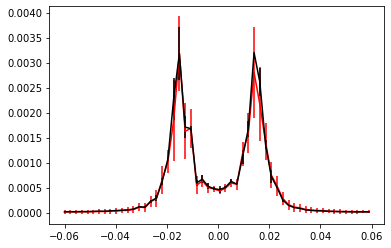

In [121]:
#plt.errorbar(oms,res,resErr)
plt.errorbar(oms2,res2,resErr2,color='r')
plt.errorbar(oms,res,resErr,color='k')

#plt.plot(oms,res,'kx')
#plt.fill_between(oms,res-resErr,res+resErr)
#plt.yscale('log')


In [633]:
def AnPoleMass(m0, H, chi):
    return (m0* H / chi)**0.5

AnPoleMass(0.365,  0.003684, 5.0)

0.016399146319244794

In [497]:
def BW(x, a,m,c):
    return  (a / ((-(x)**2 + m**2)**2 + c * (x)**2 )  )

def sBW(x, a,m,c):
    return  a / ((-x + m)**2 + c  )  

def doubleBW(x,a,b,c):
    return sBW(x,a,b,c) + sBW(-x,a,b,c)

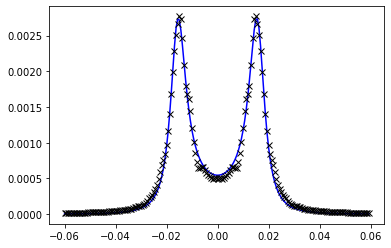

In [536]:

plt.figure(0)
res, cov = curve_fit(doubleBW, oms,np.real(resA),[0.00000003,mp,0.00001])
#plt.plot(oms, doubleBW(oms,res[0],res[1],res[2]),'r')

res2, cov2 = curve_fit(BW, oms,np.real(resA),[0.0003*res[0],res[1],res[2]])

plt.plot(oms, BW(oms,res2[0],res2[1],res2[2]),'b')

plt.plot(oms,np.real(resA),'kx')

In [11]:
test = h5py.File("../data/zplus_N048_m-0445648_h003684_c00500.h5",'r')

In [12]:
test.keys()

<KeysViewHDF5 ['phi', 'wallX_phi_0', 'wallX_phi_1', 'wallX_phi_10', 'wallX_phi_2', 'wallX_phi_3', 'wallX_phi_4', 'wallX_phi_5', 'wallX_phi_6', 'wallX_phi_7', 'wallX_phi_8', 'wallX_phi_9']>

In [21]:
res=np.asarray(test["phi"])

In [23]:
np.shape(res)

(125000, 13)